In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
from mapmanagercore import MapAnnotations, MultiImageLoader, MMapLoader
import matplotlib.pyplot as plt

In [71]:
# Create an image loader
loader = MultiImageLoader(
    lineSegments="../data/rr30a_s0u/line_segments.csv",
    points="../data/rr30a_s0u/points.csv")

# add image channels to the loader
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)
loader.readMetadata("../data/rr30a_s0u/metadata.json")

# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0, time=1)
# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1, time=1)
# loader.readMetadata("./data/rr30a_s0u/metadata.json")


# Create the annotation map
map = MapAnnotations(loader)
map.points[:]
map.segments[:]

# save the annotation map
map.save("../data/rr30a_s0u.mmap")
map.close()

/Users/cudmore/Sites/MapManagerCore/mapmanagercore/lazy_geo_pandas/schema.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, key] = df.loc[:, key].fillna(defaults[key])


In [72]:
map = MapAnnotations(MMapLoader("../data/rr30a_s0u.mmap"))

In [68]:
map._images.shape(t=0)
#_tp = map.getTimePoint(time=0)


(2, 70, 1024, 1024)

   INFO - base.py fetchSlices() line:112 -- === time:0 channel:0 sliceRange:(18, 37)


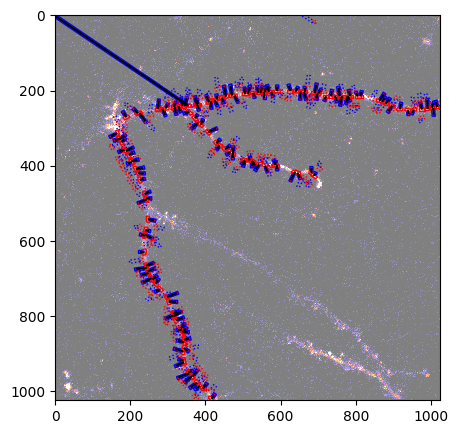

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices = map.getPixels(time=0, channel=0, zRange=(18, 36))
slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [46]:
map.points[["roiStatsBg_ch1_max", "roiStatsBg_ch2_max", "roiStats_ch1_max", "roiStats_ch2_max"]]
# map.points[:]

,,roiStatsBg_ch1_max,roiStatsBg_ch2_max,roiStats_ch1_max,roiStats_ch2_max
spineID,t,,,,
0,0,1001.0,1305.0,649.0,1255.0
1,0,429.0,255.0,420.0,193.0
2,0,388.0,303.0,1096.0,800.0
3,0,722.0,1019.0,895.0,929.0
4,0,1390.0,1180.0,379.0,268.0
...,...,...,...,...,...
134,0,417.0,128.0,329.0,243.0
135,0,665.0,1014.0,1142.0,1490.0
136,0,287.0,379.0,303.0,133.0


In [47]:
timePoint = map.getTimePoint(0)
id = timePoint.addSpine(segmentId=0, x=1,y=2,z=3)
# timePoint.moveAnchor(spineId=id, x=1, y=1, z=3)
# timePoint.moveSpine(spineId=id, x=1, y=1, z=3)
# timePoint.deleteSpine(id)
# timePoint.undo()
# timePoint.redo()
# timePoint.updateSpine(spineId=id, value={
#   "f": 1,
# })
# timePoint.undo()
# timePoint.translateBackgroundRoi()
# timePoint.deleteSegment("")
id

# abb
timePoint.points["roi"].get_coordinates()
timePoint.points["roiBase"].get_coordinates()['x'].tolist()


   INFO - base.py fetchSlices() line:110 -- === time:0 channel:1 sliceRange:(14, 21)
   INFO - base.py fetchSlices() line:110 -- === time:0 channel:0 sliceRange:(3, 4)


/Users/cudmore/opt/miniconda3/envs/mmc-env/lib/python3.11/site-packages/geopandas/geodataframe.py:2469: FutureWarning: The `drop` keyword argument is deprecated and in future the only supported behaviour will match drop=False. To silence this warning and adopt the future behaviour, stop providing `drop` as a keyword to `set_geometry`. To replicate the `drop=True` behaviour you should update your code to
`geo_col_name = gdf.active_geometry_name; gdf.set_geometry(new_geo_col).drop(columns=geo_col_name).rename_geometry(geo_col_name)`.
  return gf.set_geometry(col, drop=drop, inplace=False, crs=crs)
/Users/cudmore/opt/miniconda3/envs/mmc-env/lib/python3.11/site-packages/geopandas/geodataframe.py:2469: FutureWarning: The `drop` keyword argument is deprecated and in future the only supported behaviour will match drop=False. To silence this warning and adopt the future behaviour, stop providing `drop` as a keyword to `set_geometry`. To replicate the `drop=True` behaviour you should update you

[431.0,
 432.0,
 432.0,
 435.0,
 430.0,
 429.0,
 417.0,
 417.0,
 430.0,
 431.0,
 386.0,
 370.0,
 370.0,
 386.0,
 386.0,
 412.0,
 413.0,
 413.0,
 414.0,
 418.0,
 421.0,
 421.0,
 416.0,
 415.0,
 414.0,
 414.0,
 413.0,
 409.0,
 407.0,
 407.0,
 411.0,
 412.0,
 453.0,
 451.0,
 437.0,
 436.0,
 436.0,
 434.0,
 439.0,
 440.0,
 453.0,
 485.0,
 484.0,
 481.0,
 469.0,
 469.0,
 481.0,
 485.0,
 535.0,
 519.0,
 519.0,
 535.0,
 535.0,
 565.0,
 549.0,
 549.0,
 565.0,
 565.0,
 583.0,
 567.0,
 567.0,
 583.0,
 583.0,
 661.0,
 645.0,
 645.0,
 661.0,
 661.0,
 670.0,
 654.0,
 654.0,
 670.0,
 670.0,
 729.0,
 713.0,
 713.0,
 729.0,
 729.0,
 703.0,
 707.0,
 701.0,
 701.0,
 700.0,
 699.0,
 690.0,
 690.0,
 698.0,
 703.0,
 753.0,
 737.0,
 737.0,
 753.0,
 753.0,
 771.0,
 755.0,
 755.0,
 771.0,
 771.0,
 786.0,
 770.0,
 770.0,
 786.0,
 786.0,
 787.0,
 771.0,
 771.0,
 787.0,
 787.0,
 902.0,
 906.0,
 899.0,
 898.0,
 890.0,
 888.0,
 896.0,
 902.0,
 943.0,
 947.0,
 946.0,
 943.0,
 932.0,
 930.0,
 942.0,
 943.0,
 952.0,


In [48]:
from mapmanagercore.schemas.spine import Spine


map.updateSpine(spineId=1, value=Spine(
  note="This is a note",
))
map.points[(1, ), ["note"]]

,,note
spineID,t,
1,0,This is a note


In [49]:
timePoint.points[1, "note"]

'This is a note'

In [50]:
map.segments["segment"].get_coordinates(include_z=True)
# map.segments["left"]

x      y       z
segmentID t                      
0         0  354.0  240.0  31.000
          0  359.0  240.0  31.000
          0  363.0  236.0  31.000
          0  391.0  236.0  31.000
          0  395.0  232.0  31.000
...            ...    ...     ...
4         0  241.0  479.0  28.222
          0  242.0  487.0  28.111
          0  245.0  492.0  28.000
          0  245.0  503.0  27.889
          0  247.0  508.0  27.667

[221 rows x 3 columns]

In [51]:
map.points["roi"].get_coordinates()
map.points['anchorLine']

spineID  t
0        0      LINESTRING (425 225.4, 431 239)
1        0        LINESTRING (378 236, 382 250)
2        0        LINESTRING (414 228, 416 245)
3        0      LINESTRING (444 218.1, 447 231)
4        0        LINESTRING (477 213, 486 229)
                            ...                
135      0    LINESTRING (220.2 419.9, 236 420)
136      0        LINESTRING (242 487, 253 486)
137      0    LINESTRING (214.9 409.1, 234 405)
138      0        LINESTRING (172 328, 159 332)
139      0            LINESTRING (354 240, 1 2)
Name: anchorLine, Length: 140, dtype: geometry

In [52]:
map.points["roiBase"].get_coordinates()

x      y
spineID t              
0       0  431.0  229.0
        0  432.0  229.0
        0  432.0  228.0
        0  435.0  226.0
        0  430.0  220.0
...          ...    ...
139     0  357.0  236.0
        0  354.0  236.0
        0  354.0  244.0
        0  359.0  244.0
        0  360.0  244.0

[1689 rows x 2 columns]

In [53]:
slices = map.getPixels(time=0, channel=0, zRange=(18, 36))

   INFO - base.py fetchSlices() line:110 -- === time:0 channel:0 sliceRange:(18, 37)


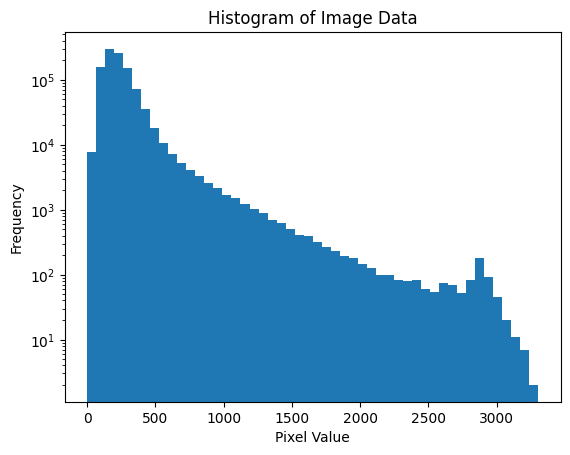

In [17]:
plt.hist(slices.data(), bins=50)
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

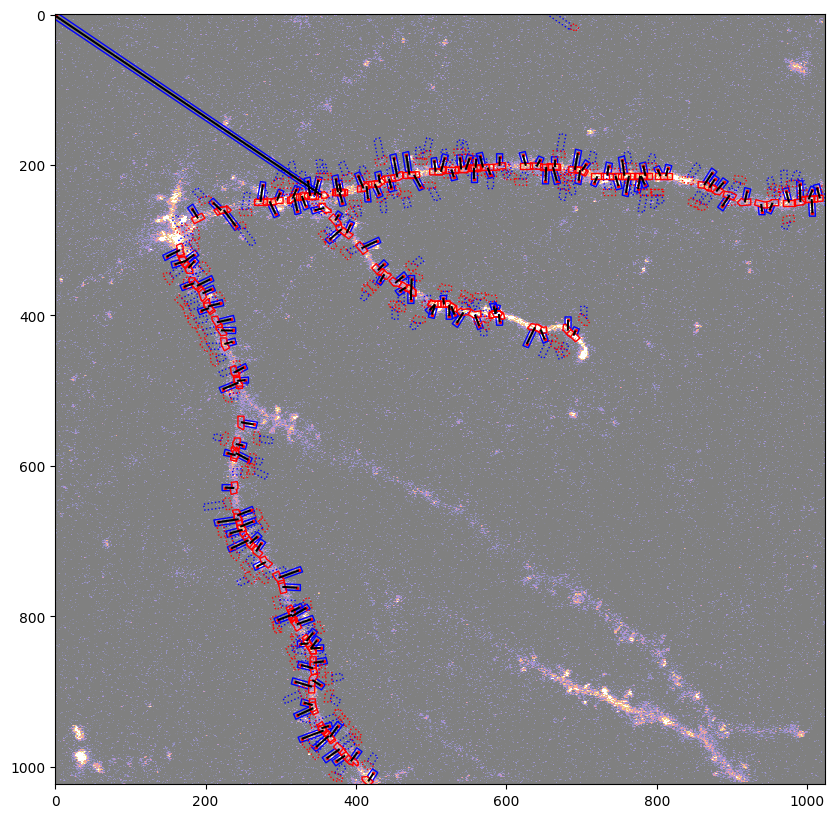

In [18]:

fig, ax = plt.subplots(figsize=(10, 10))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [19]:
map.points["z"].between(10, 40)

spineID  t
0        0     True
1        0     True
2        0     True
3        0     True
4        0     True
              ...  
135      0     True
136      0     True
137      0     True
138      0     True
139      0    False
Name: z, Length: 140, dtype: boolean

In [20]:
filtered = map.filterPoints(map.points["z"].between(10, 40))

In [21]:
filtered.points[:, "z"]

spineID  t
0        0    31
1        0    31
2        0    31
3        0    31
4        0    31
              ..
134      0    29
135      0    29
136      0    28
137      0    29
138      0    31
Name: z, Length: 139, dtype: Int64

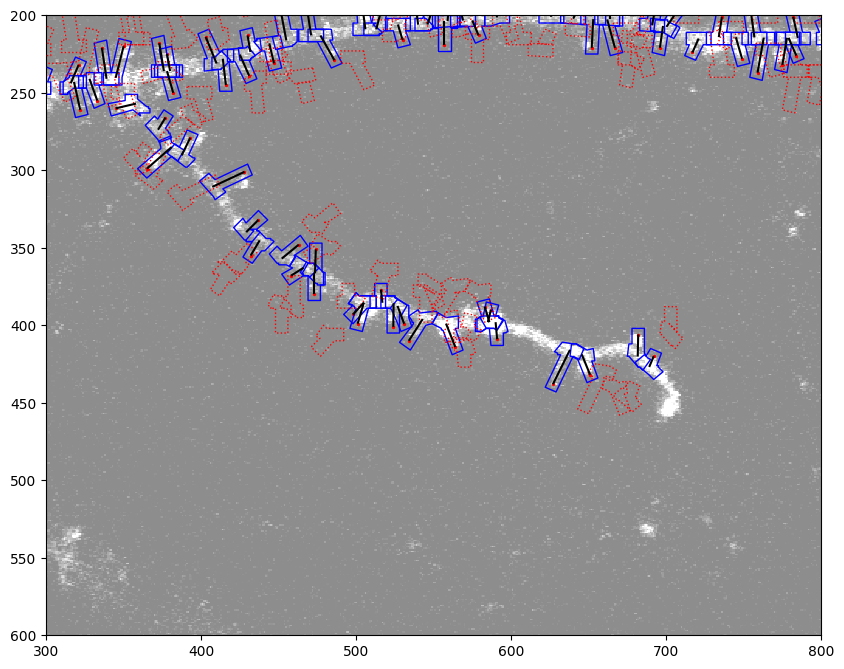

In [22]:
slices = filtered.getPixels(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.points["anchorLine"].plot(color='black', ax=ax)
filtered.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

filtered.points["roi"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered.points["roiBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [23]:
layers = map.getTimePoint(0).getAnnotations(options={
    "zRange": (18, 36),
    "annotationSelections": {
      "segmentIDEditing": 1,
      "segmentID": 1,
      "spineID": 1
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-ghost-left-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x139231580>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._segmentGhost.<locals>.<lambda> at 0x1392096c0>} 
 coords:                     x           y
segmentID                        
1          358.656854  240.343146
1          360.656854  242.343146 


Properties: {'id': 'segment-ghost-right-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x139231580>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x138e567a0>} 
 coords:                x          y
segmentID                  
1          347.0  251.23873
1          347.0  256.00000 


Properties: {'id': 'segment-ghost-left-ghost-interaction', 'select': 'segmentID', 'edit': 'segment